<a href="https://colab.research.google.com/github/chanyoung1998/LearningML-DL/blob/main/7%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공 신경망

##로지스틱  회귀로 패션 아이템 분류

In [49]:
from tensorflow import keras
(train_input, train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [50]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [51]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


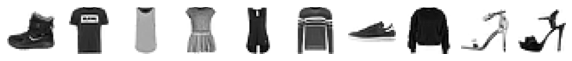

[9 0 0 3 0 2 7 2 5 5]


In [52]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,10,figsize = (10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap = 'gray_r')
  axs[i].axis('off')
plt.show()
print(train_target[:10])



0.티셔츠
1.바지
2.스웨터
3.드레스
4.코트
5.샌달
6.셔츠
7.스니커즈
8.가방
9.앵클부츠



In [53]:
import numpy as np
print(np.unique(train_target,return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [54]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28)
print(train_scaled.shape)

(60000, 784)


In [55]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log',max_iter = 5,random_state = 42)
scores = cross_validate(sc,train_scaled,train_target,n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


##인공 신경망

In [56]:
from tensorflow import keras  
from sklearn.model_selection import train_test_split

train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size = 0.2, random_state =42)
print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [57]:
 dense = keras.layers.Dense(10,activation='softmax',input_shape = (784,))
 model = keras.Sequential(dense)

In [58]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [59]:
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7682 - accuracy: 0.7417
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4861 - accuracy: 0.8377
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4513 - accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4521 - accuracy: 0.8493
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4314 - accuracy: 0.8580


In [60]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4511 - accuracy: 0.8478


[0.45110535621643066, 0.8478333353996277]

#심층 신경망

In [65]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size = 0.2, random_state =42)

In [70]:
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape = (784,),name = 'hidden')
dense2 = keras.layers.Dense(10,activation='softmax',name = 'output')
model = keras.Sequential([dense1,dense2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7687 - accuracy: 0.7508
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4228 - accuracy: 0.8488
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3812 - accuracy: 0.8616
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3536 - accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3297 - accuracy: 0.8814


##렐루 함수

In [73]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [74]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size = 0.2, random_state =42)

In [77]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6733 - accuracy: 0.7639
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4002 - accuracy: 0.8548
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3312 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3206 - accuracy: 0.8840


In [78]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3736 - accuracy: 0.8731


[0.37359216809272766, 0.8730833530426025]

#신경망 모델 훈련


##손실 곡선

In [94]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size = 0.2, random_state =42)

In [95]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [96]:
model = model_fn()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5)
print(history.history.keys())

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6835 - accuracy: 0.7649
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3926 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3567 - accuracy: 0.8721
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3201 - accuracy: 0.8850
dict_keys(['loss', 'accuracy'])


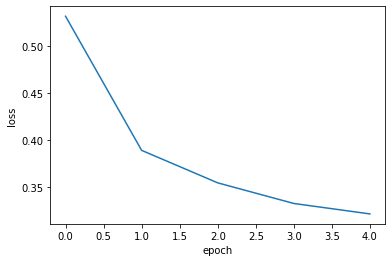

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

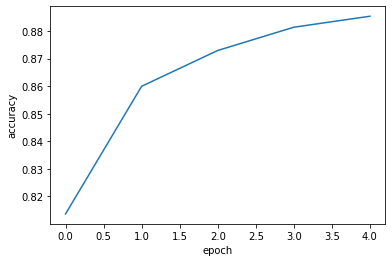

In [99]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

##검증 손실

In [100]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5,verbose = 0,validation_data=(val_scaled,val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-

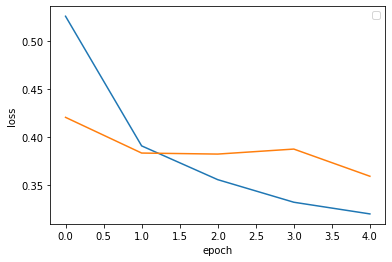

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('loss','val_loss')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

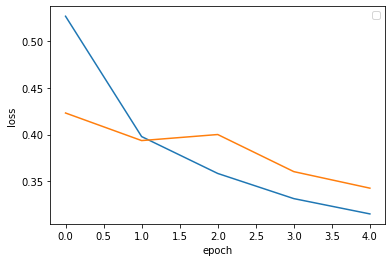

In [103]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5,verbose = 0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('loss','val_loss')
plt.show()

##드롭아웃


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.h

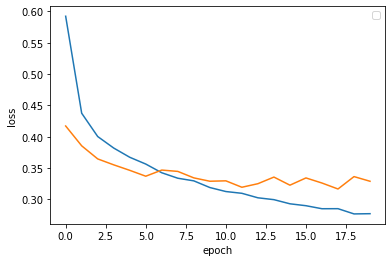

In [104]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose = 0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('loss','val_loss')
plt.show()

##콜백

In [105]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
model.fit(train_scaled,train_target,epochs=20,verbose = 0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [106]:
model = keras.models.load_model('best_model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8848


[0.32822945713996887, 0.8848333358764648]

In [107]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights= True)
history = model.fit(train_scaled,train_target,epochs=20,verbose = 0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

In [108]:
print(early_stopping_cb.stopped_epoch)

14


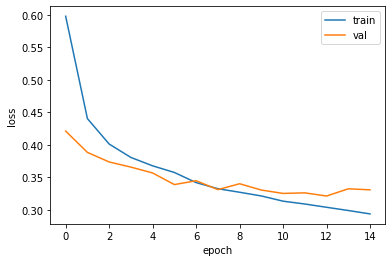

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

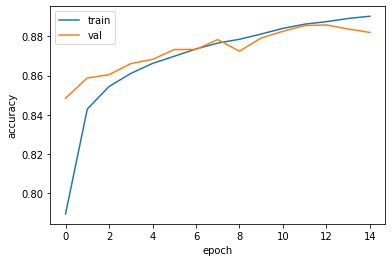

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [110]:
print(model.evaluate(val_scaled,val_target))

model2 = keras.models.load_model('best_model.h5')
print(model2.evaluate(val_scaled,val_target))

375/375 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.8858
[0.3214690089225769, 0.8858333230018616]
375/375 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8820
[0.3310248851776123, 0.8820000290870667]
